## Missing Values - Feature Engineering

### All the techniques of handling missing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation


### 1. Mean/ Median /Mode imputation
- Replaces missing values with the mean, median, or mode of the observed values.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df=pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
## Lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [13]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [14]:
median=df.Age.median()
median

28.0

In [15]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [16]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

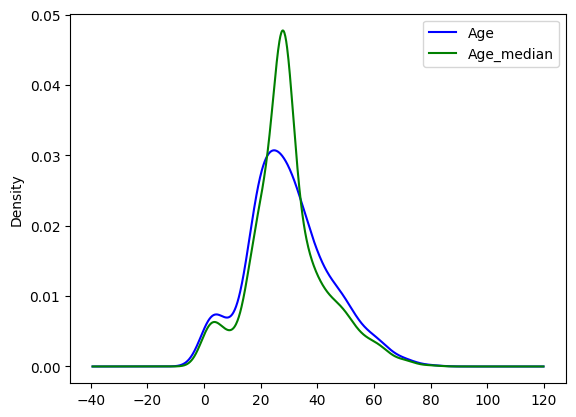

In [18]:
fig = plt.figure()
df['Age'].plot(kind='kde',color = 'blue')
df.Age_median.plot(kind='kde', color='green')
plt.legend()

### Model Building and Accuracy testing

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train,X_test,y_train,y_test=train_test_split(df[['Age_median','Fare']],df['Survived'],test_size=0.3)

model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6604477611940298


#### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset
#### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation


### 2. Random Sample Imputation
- Fills missing values with randomly sampled values from the observed data. This can help in maintaining the variability of the data.

In [20]:
import pandas as pd
df=pd.read_csv('Titanic-Dataset.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [21]:
# percentage
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [22]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[random_sample.index, variable+"_random"] = random_sample.values

In [23]:
impute_nan(df,'Age',median)

In [24]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


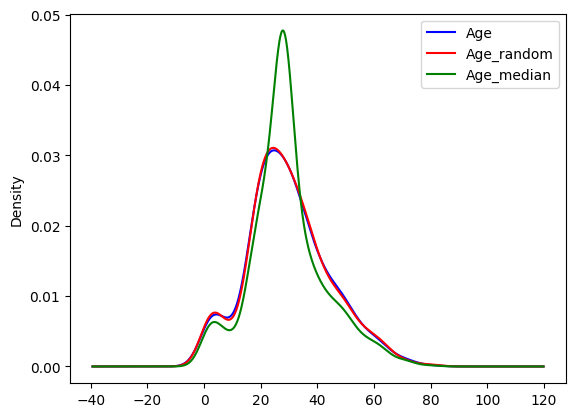

In [25]:
fig = plt.figure()
df['Age'].plot(kind='kde',color = 'blue')
df.Age_random.plot(kind='kde', color='red')
df.Age_median.plot(kind='kde', color='green')
plt.legend()


### Model Building and Accuracy testing

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train,X_test,y_train,y_test=train_test_split(df[['Age_random','Fare']],df['Survived'],test_size=0.3)

model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7052238805970149


##### Advantages
1. Easy To implement
2. There is less distortion in variance

##### Disadvantage
1. Every situation randomness wont work

### 3. Capturing NAN values with a new feature
- Adds a binary feature indicating whether a value was missing. This method helps capture the information that the missingness itself might convey.


In [27]:
df=pd.read_csv('Titanic-Dataset.csv', usecols=['Age','Fare','Survived'])

In [28]:
# create new column with value 1 for null age column , 0 for non null value
df['Age_Nan'] = np.where(df['Age'].isnull(),1,0)
df.head()

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [29]:
df['Age'].fillna(df.Age.median(),inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_6972\2569459057.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df.Age.median(),inplace=True)


### Model Building and Accuracy testing

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train,X_test,y_train,y_test=train_test_split(df[['Age','Age_Nan','Fare']],df['Survived'],test_size=0.3)

model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7126865671641791


#### Advantages
1. Easy to implement
2. Captures the importance of missing values

##### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

### 4. End of Distribution Imputation
- Replaces missing values with a value at the end of the distribution, such as the maximum or minimum observed value.

In [31]:
df=pd.read_csv('Titanic-Dataset.csv', usecols=['Age','Fare','Survived'])


<Axes: >

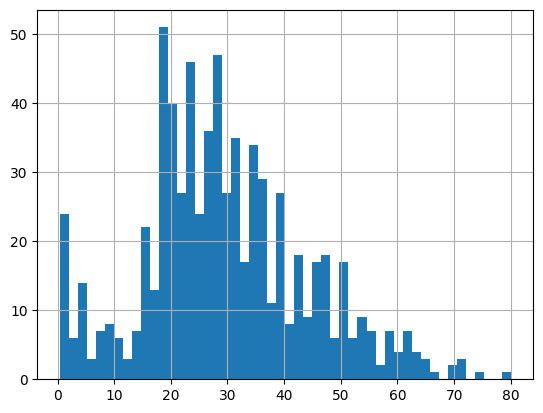

In [37]:
df.Age.hist(bins=50)

<Axes: ylabel='Age'>

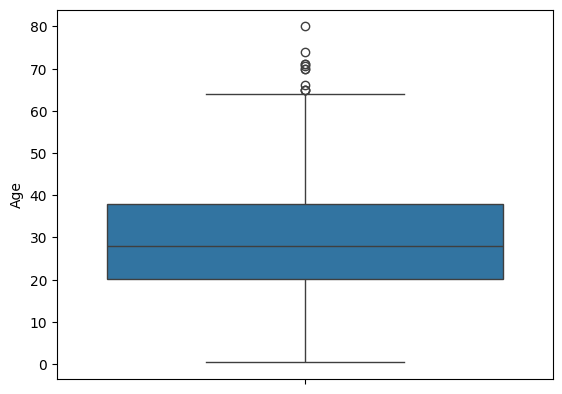

In [40]:
import seaborn as sns

sns.boxplot(data=df['Age'])

In [42]:
# calculate value after 3rd std 
extreme = df.Age.mean()+3*df.Age.std()

In [43]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [44]:
impute_nan(df,'Age',df.Age.median(),extreme)

C:\Users\acer\AppData\Local\Temp\ipykernel_4812\1926933604.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(median,inplace=True)


In [45]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<Axes: >

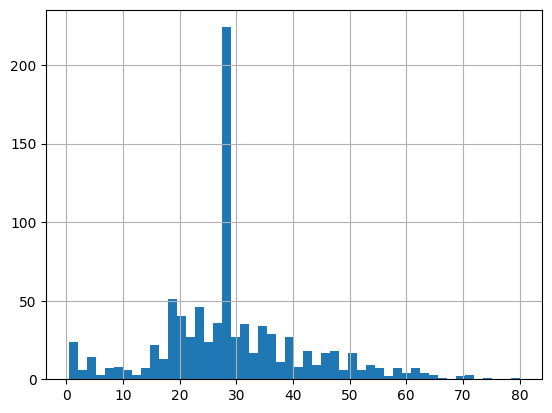

In [149]:
df['Age'].hist(bins=50)

<Axes: >

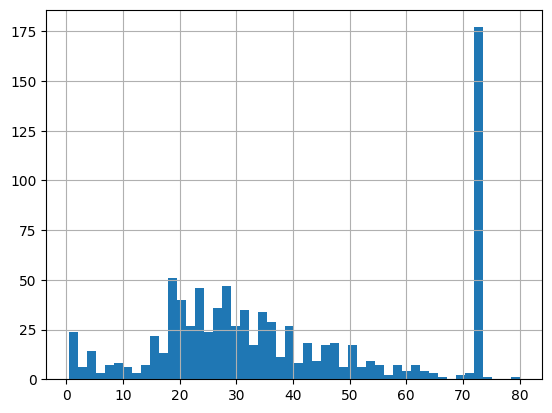

In [150]:
df['Age_end_distribution'].hist(bins=50)

<Axes: ylabel='Age_end_distribution'>

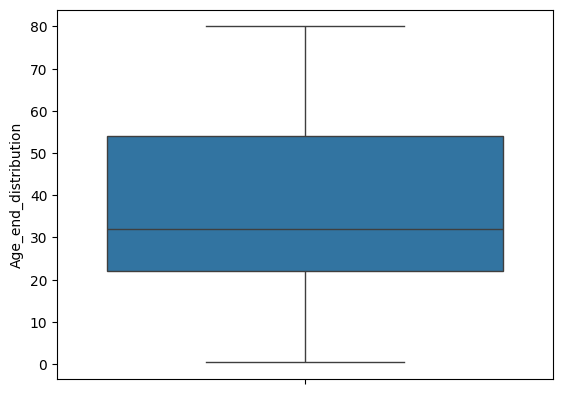

In [151]:
import matplotlib.pyplot as plt
sns.boxplot(data=df['Age_end_distribution'])


In above boxplot it removes outliers

### Model Building and Accuracy testing

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train,X_test,y_train,y_test=train_test_split(df[['Age_end_distribution','Fare']],df['Survived'],test_size=0.3)

model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6007462686567164


### 5. Arbitrary Value Imputation
Best For When other methods are not suitable or if there is no strong pattern in the missing data.It consists of replacing NAN by an arbitrary value

In [47]:
df=pd.read_csv('Titanic-Dataset.csv', usecols=['Age','Fare','Survived'])

In [48]:

def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)
    

In [49]:
impute_nan(df,'Age')

In [50]:
df.head()

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


<Axes: >

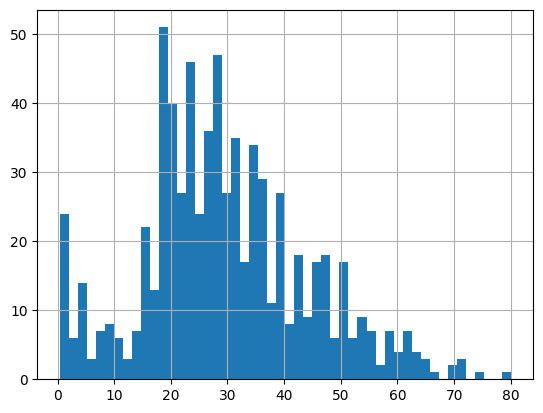

In [51]:
df['Age'].hist(bins=50)

<Axes: >

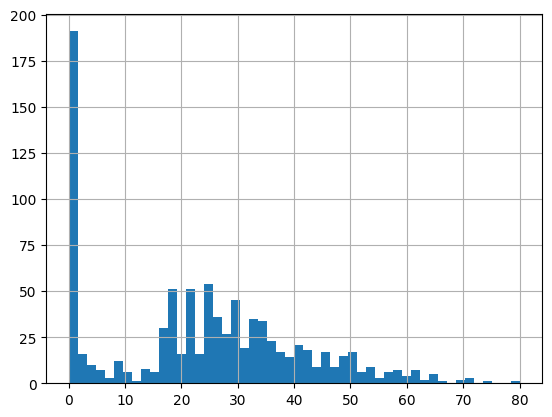

In [52]:
df['Age_zero'].hist(bins=50)

<Axes: >

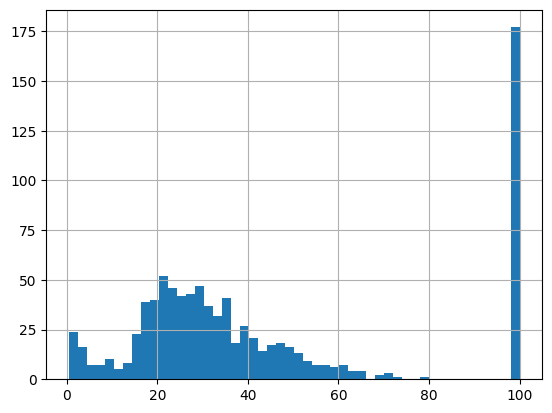

In [53]:
df['Age_hundred'].hist(bins=50)

### Model Building and Accuracy testing

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train,X_test,y_train,y_test=train_test_split(df[['Age_zero','Age_hundred','Fare']],df['Survived'],test_size=0.3)

model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6567164179104478


### Accuracy of all above techniques used for fill Nan values 
- Fill Nan values with Median : Accuracy: 0.6417910447761194
- Fill Nan values with random_sample : Accuracy: 0.664179104477612
- Capturing NAN values with a new feature : Accuracy: 0.6604477611940298
- Replaces missing values with a value at the end of the distribution : Accuracy: 0.6007462686567164
- Arbitrary Value Imputation : Accuracy: 0.6567164179104478

#### Conclusion 
Fill Nan values with random_sample is highest accuracy :0.664179104477612

## How To Handle Categorical Missing Values
### 1. Frequent Category Imputation

In [14]:
df=pd.read_csv('house_price.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [19]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [15]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

### Compute the frequency with every feature


In [30]:
df['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

<Axes: xlabel='BsmtQual'>

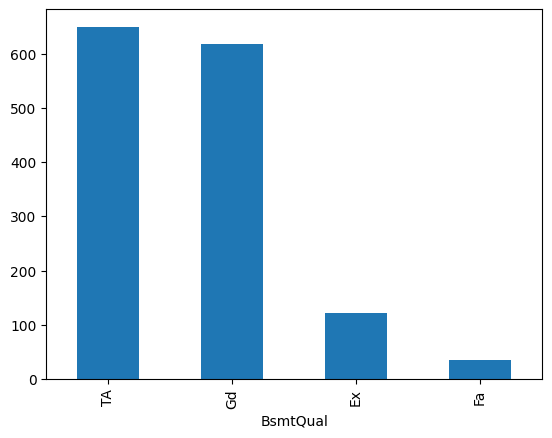

In [32]:
df['BsmtQual'].value_counts().plot(kind = 'bar')

<Axes: xlabel='GarageType'>

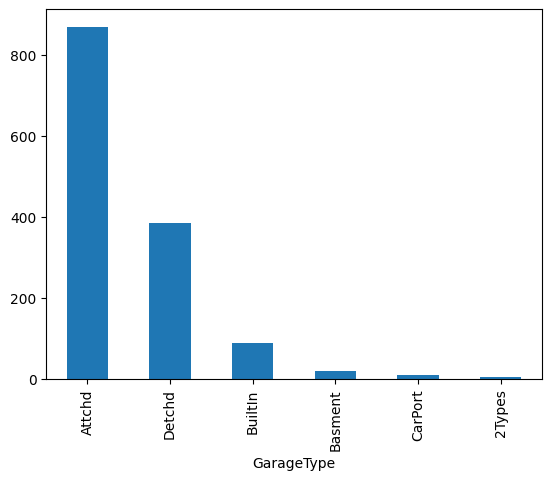

In [33]:
df['GarageType'].value_counts().plot(kind = 'bar')

<Axes: xlabel='FireplaceQu'>

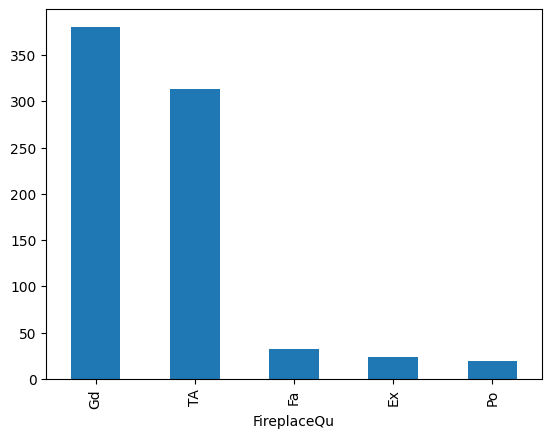

In [34]:
df['FireplaceQu'].value_counts().plot(kind = 'bar')

#### create function for replace null values with mode

In [36]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [37]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

C:\Users\acer\AppData\Local\Temp\ipykernel_8828\2451126640.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(most_frequent_category,inplace=True)


In [38]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

### Advantages
- Easy To implement
- Fater way to implement
### Disadvantages
- If there are many missing values (NaNs) in the dataset, imputing them with the most frequent label can lead to that label becoming overrepresented
- It distorts the relation of the most frequent label

### 2. Capturing NAN values with a new feature

In [47]:
df=pd.read_csv('house_price.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [48]:
# create new column replace Nan with 1 and non_Nan with 0
df['FireplaceQu_Nan'] = np.where(df['FireplaceQu'].isnull(),1,0)

# fill Nan values in FireplaceQu column with mode
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_8828\308301359.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna(frequent,inplace=True)


In [49]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_Nan
0,Gd,Gd,Attchd,208500,1
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


### Suppose if you have more frequent categories, we just replace NAN with a new category

In [50]:
df=pd.read_csv('house_price.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [51]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [52]:
# it create new column and add new missing value in Nan values
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)


In [55]:
# now we can drop orginal column
df.drop(columns = ['BsmtQual','FireplaceQu','GarageType'],axis = 1, inplace =True)

In [56]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
